In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Read the data with read_csv() into a pandas dataframe
housing_df = pd.read_csv('housing.csv')

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# Use .shape to understand how many observations (ie rows/records) of the dataset
# The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
# (row count, column count)
housing_df.shape

(20640, 10)

In [4]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset 
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset 
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Prepare & Preprocess Data

Understand missing data that could skew the model

In [7]:
# Verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

Use imputation to handle missing data

In [9]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

Impute missing data using machine learning

In [10]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [11]:
# confirm there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

Overlay the imputed column over the old column with missing values

In [12]:
# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Use visualizations to understand the relationship of the target variable with other features

Histograms

Text(0.5, 0, 'House Values')

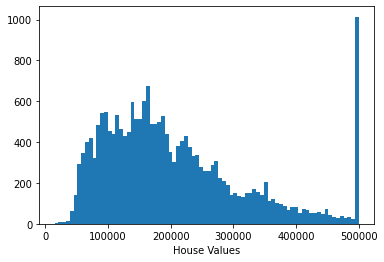

In [13]:
# Plot the distribution of the target variable (median_house_value) using a histogram

# bins->amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")


# We can see from the plot that the values of Median House Value are distributed normally with few outliers. 
# Most of the house are around 100,000-200,000 range

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

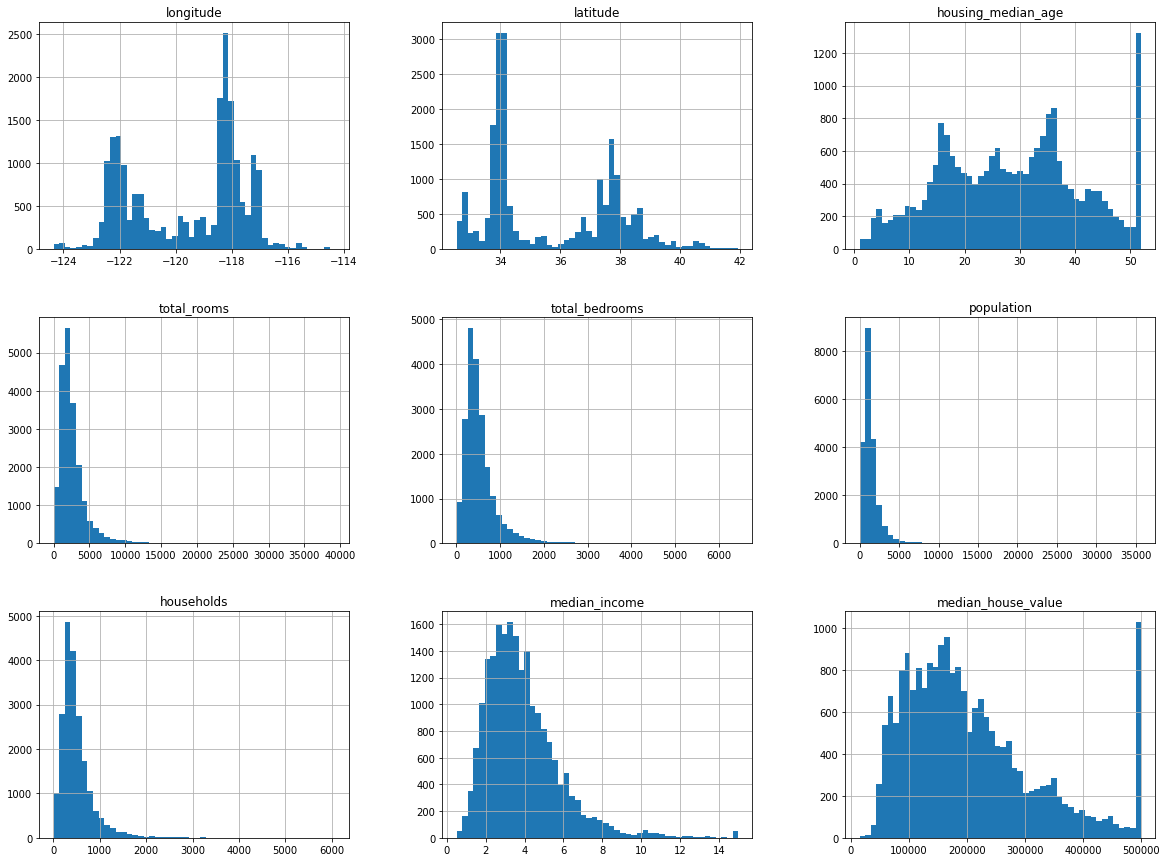

In [14]:
# let's do histograms for the all the features to understand the data distributions
# using housing_df as to not plot the encoded values for OCEAN_PROXIMITY 
housing_df.hist(bins=50, figsize=(20,15))

Use a heatmap to show correlation

In [15]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = housing_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms   
longitude            1.000000 -0.924664           -0.108197     0.044568  \
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income   
longitude                 0.069260    0.099773    0.055310      -0.015176  \
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

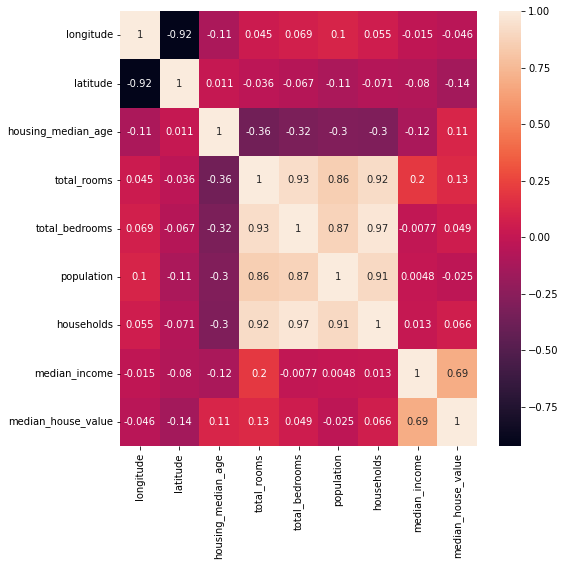

In [16]:
# make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

Feature Engineering

In [17]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance

#  a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_df['population_per_household']= housing_df['population']/housing_df['households']

# let's combine the latitude and longitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

Heatmap after removing correlation

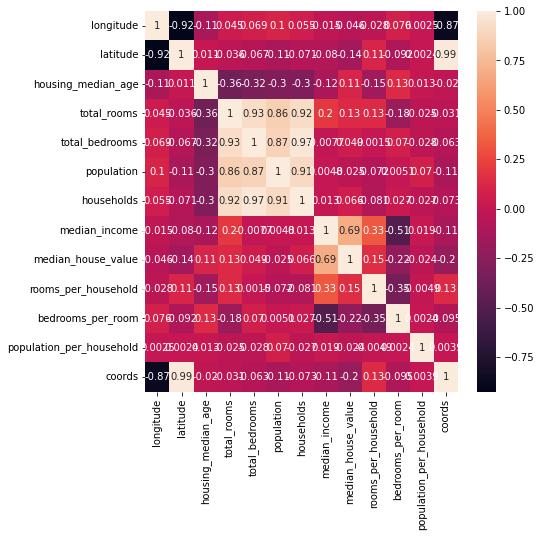

In [18]:
corr = housing_df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

Encode categorical data

In [19]:
# Most ML algorithms can only learn from numeric data (it's all Math) so categorical data must be encoded (i.e. converted) to numeric data

# Let's review our data types again; showing that ocean_proximity is the only categorical data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [20]:
# let's see the unique categories for OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
# let's count
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

One-Hot Encoding

In [22]:
# Let's see how the Panda's get_dummies() function works
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [23]:
# let's replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
housing_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False
